# Weather forecast in Australia

## Import Utilization Tools
(Run before starting any code)

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("weatherAUS.csv")

## Variables/Head
What the first five columns in my data looks like and the types of data

In [165]:
df.head()


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [166]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

## Introduction
### I chose this data becuase I have a friend that went to sudy abroad in Australia and thought it would be interesting to look at some data about it. This dataset is full of different variables which I'll simply use **classification just for whether it <font color=blue>rained</font> or not or if there was <font color=darkyellow>sunshine</font>.**<br>
### Both of which are float values which I will use a range of 0-1mm for rain while sunshine is given.<br>
## DataCleanup

In [167]:
print('Column "Rainfall" has' , df.Rainfall.isna().sum(), 'missing values')
print('Column "Sunshine" has' , df.Sunshine.isna().sum(), 'missing values')
df.shape 
df.info()
## Dropping columns that have more than 30% missing values.


Column "Rainfall" has 3261 missing values
Column "Sunshine" has 69835 missing values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    1428

### This shows us how there is a ton of missing data however this data has been taken for **10Years(3650 days), from 10 regions in all with multiple locations/weatherstations recording data.** (Over 145 thousand observations/columns)

In [168]:
df = df.dropna(subset = ['Rainfall','Sunshine'])

df.isna().sum()


Date                0
Location            0
MinTemp            80
MaxTemp            64
Rainfall            0
Evaporation      3908
Sunshine            0
WindGustDir      4419
WindGustSpeed    4396
WindDir9am       2663
WindDir3pm        676
WindSpeed9am      156
WindSpeed3pm      389
Humidity9am       387
Humidity3pm       572
Pressure9am       128
Pressure3pm       140
Cloud9am         7732
Cloud3pm         9353
Temp9am           115
Temp3pm           324
RainToday           0
RainTomorrow      397
dtype: int64

### This is after dropping all columns that have missing Rainfall and Sunshine Variables.

Rainfall mean: 2.373617553341669
Rainfall std: 8.890266159853123


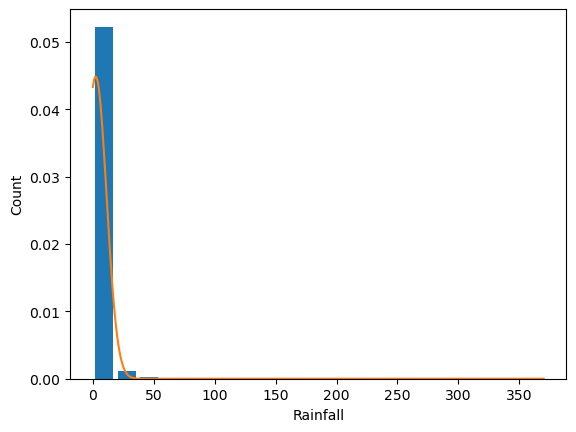

In [169]:
from scipy.stats import norm

plt.hist(df.Rainfall, bins=20, rwidth=0.8, density = True)
plt.xlabel('Rainfall')
plt.ylabel('Count')

rng = np.arange(df.Rainfall.min(), df.Rainfall.max())
plt.plot(rng, norm.pdf(rng, df.Rainfall.mean(), df.Rainfall.std()))

## Display mean & std
print('Rainfall mean:', df.Rainfall.mean())
print('Rainfall std:', df.Rainfall.std())

### This is to see how when it does rain, what is the amount on average that it does and how much it can deviate

Sunshine mean: 7.625837938127697
Sunshine std: 3.7818113278064005


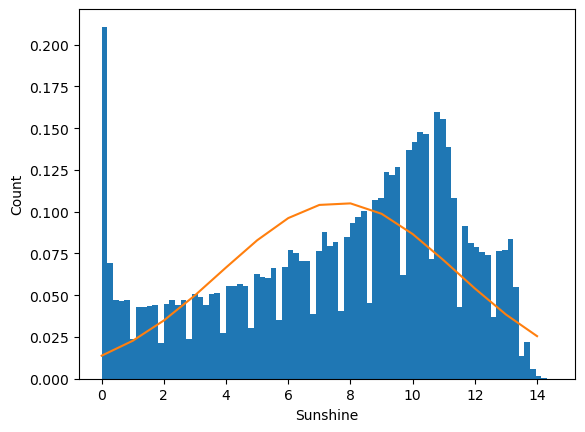

In [170]:
plt.hist(df.Sunshine, bins=80, rwidth=2, density = True)
plt.xlabel('Sunshine')
plt.ylabel('Count')

rng = np.arange(df.Sunshine.min(), df.Sunshine.max())
plt.plot(rng, norm.pdf(rng, df.Sunshine.mean(), df.Sunshine.std()))

## Display mean & std
print('Sunshine mean:', df.Sunshine.mean())
print('Sunshine std:', df.Sunshine.std())

### This is to see how long on average the sun is out during the day what is the amount on average that it does and how much it can deviate
### We only have 14 hours of Daytime before Night and any reason for there to be less of that is due to weather.

In [171]:
print("Rainfall greater than 1mm: ", 
      sum(df.Rainfall > 1)) 
print("Rainfall less than or equal to 1mm: ", 
      sum(df.Rainfall <= 1)) 
print("Sunshine greater than 0hrs: ", 
      sum(df.Sunshine > 0)) 
print("Number of times there was no Sunshine: ", 
      sum(df.Sunshine == 0)) 
dfNoRain = df.Rainfall <=1
dfYesRain = df.Rainfall > 1

Rainfall greater than 1mm:  16820
Rainfall less than or equal to 1mm:  57559
Sunshine greater than 0hrs:  72066
Number of times there was no Sunshine:  2313


## Finding out our values
### In most cases when it rains less than 1 mm it doesn't count as having rained so little it's almost unnoticable, below by using a greater than statement we can convert if it rained into a true of false  onl columns that have rainfall values (we dropped all null rainfall columns)

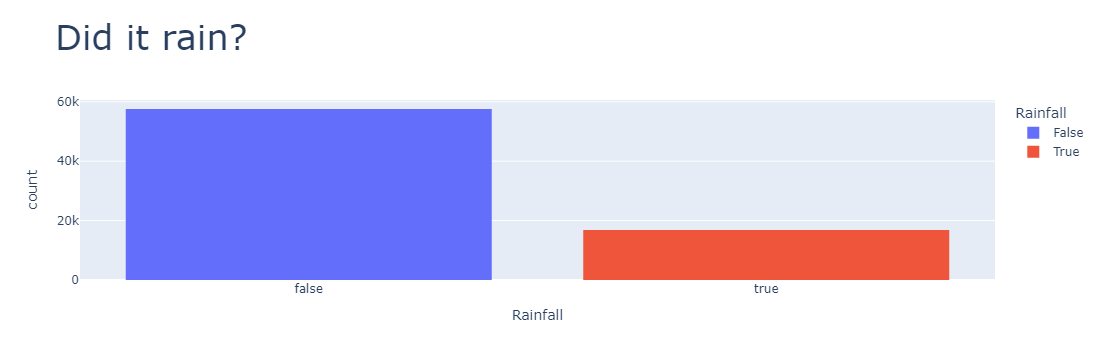

In [172]:
rainTrFa = df['Rainfall'] > 1.
fig = px.histogram(rainTrFa, x='Rainfall', color='Rainfall',title='Did it rain?')
fig.update_layout(title_font=dict(size=35))
fig.show()

## What about Sunshine?
### This one is a little bit more tricky, it all depends on what you want to look for. For example, below if the sun was out at all its considered true but if you believe it needs to be out lets say 8 hours a day at least for it to be sunny your table might look like the next table.

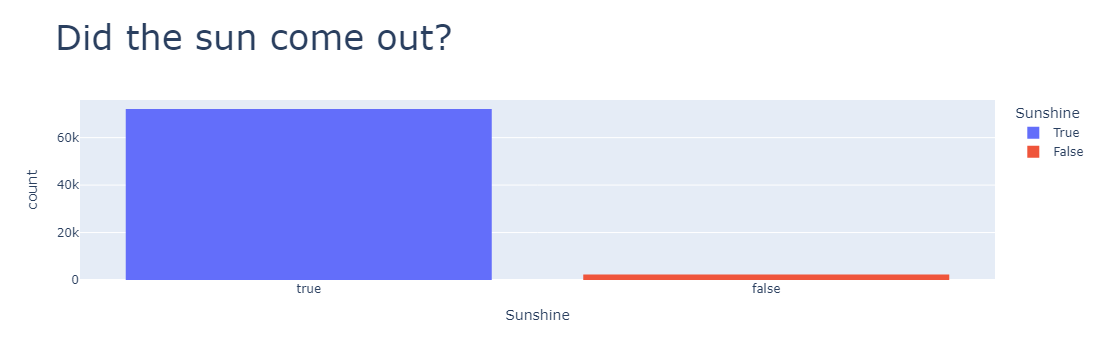

In [173]:
sunTrFa = df['Sunshine'] > 0
fig = px.histogram(sunTrFa, x='Sunshine', color='Sunshine',title='Did the sun come out?')
fig.update_layout(title_font=dict(size=35))
fig.show()

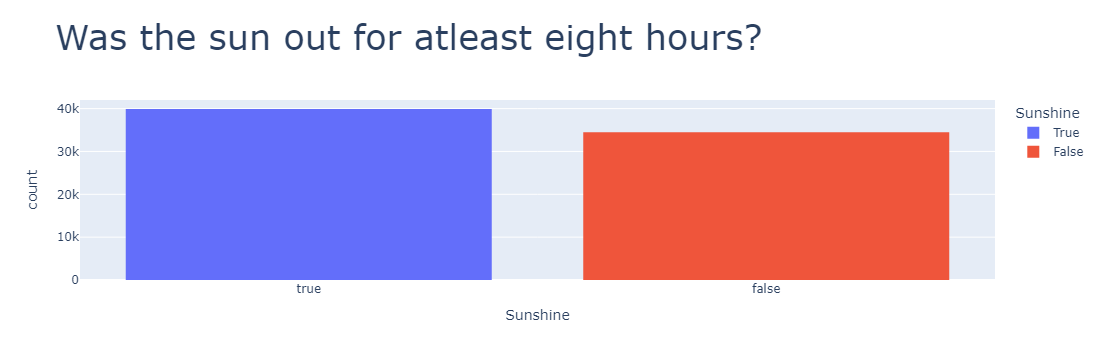

In [174]:
sunTrFa = df['Sunshine'] > 8
fig = px.histogram(sunTrFa, x='Sunshine', color='Sunshine',title='Was the sun out for atleast eight hours?')
fig.update_layout(title_font=dict(size=35))
fig.show()

# Storytelling
### Well I've learned a few things I find strange in AUS, other than the giant spiders and accents. It's not as sunny as you would believe or atleast in the locations with weather stations. I believe this is due to most weather statons being on the coast where there are more storms and weather formations. When measuring sunslight it's just essentially measuring cloud coverage while when it comes to rainfall it takes an average over the whole continent, this might be why when looking at the earlier graphs the average rainfall in mm is super low even though it rains quite a bit (about 23% of the time).

## Impact
### Well not much can be taken from my data modeling, it's just finding the average sunslight and rain while classifying the weather whether it rained, didn't, or was sunny. This can be used though for putting things into perspective such as how if you plan to travel around AUS it might rain 'frequently' however the amount is so little most of the time it might as well no have rained at all. Even when it does rain heavy, from the data in the last 10 years you can expect it to rarely if not ever pass 50mm.